In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [28]:
nav_df = pd.read_csv('../.tmp/navigation_df.csv', index_col= 0)
rocks_df = pd.read_csv('../.tmp/rocks_df.csv', index_col = 0)
obs_map = pd.read_csv('../.tmp/obs_map.csv', index_col =0)
obs_map = obs_map > 0
obs_df = pd.read_csv('../.tmp/obs_df.csv', index_col = 0)
obs_pix_df = pd.read_csv('../.tmp/obs_pix.csv', index_col = 0)

(0, 2)
Empty DataFrame
Columns: [angles, distance]
Index: []
(7300, 2)
     angles    distance
0  0.056191  160.252925
1  0.049958  160.199875
2  0.043722  160.153052
3  0.037482  160.112460
4  0.031240  160.078106
     angles    distance
0  0.785398  226.274170
1  0.782263  225.568172
2  0.779109  224.864404
3  0.775935  224.162887
4  0.772741  223.463644


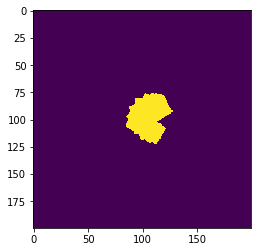

In [38]:
print(rocks_df.shape)
print(rocks_df.head())
print(nav_df.shape)
print(nav_df.head())
print(obs_df.head())
plt.imshow(obs_map)


In [30]:
print(nav_df.describe())

            angles     distance
count  7300.000000  7300.000000
mean      0.018958    78.864701
std       0.291788    35.192407
min      -0.708626     5.000000
25%      -0.175789    53.009433
50%      -0.000000    76.922038
75%       0.202689   102.612134
max       0.708626   160.798010


In [31]:
print(obs_df.describe())

            angles     distance
count  8569.000000  8569.000000
mean      0.009448   173.246038
std       0.549146    22.460406
min      -0.874205   132.242202
25%      -0.520517   155.261070
50%       0.087278   169.941166
75%       0.535503   191.107300
max       0.880996   226.274170


In [37]:
"""Find the normal at a range of rover yaw angles"""
right = -65
left = 10
max_threshold = 125
yaws = []
distances = []
yaws_df = pd.DataFrame([], columns = ['normal', 'tangent','distance','yaw',], index=[])
headings = range(right,left, 5)
for phi in headings:
    phi = np.deg2rad(phi)

    flt = np.random.random() / 1e4
    phi_set =obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)]
    if len(phi_set) == 0 :
        continue
    else:
        a = np.min(phi_set.angles)
        ar = np.min(phi_set[phi_set.angles == a].distance)
        
        b = np.max(phi_set.angles)
        br = np.min(phi_set[phi_set.angles == b].distance)
       
    if (ar > max_threshold) & (br > max_threshold) :
        normal = 0
        tangent = normal - (np.pi/2)
    else :
        ax, ay = np.sin(a)*ar, np.cos(a)*ar
        bx, by = np.sin(b)*br, np.cos(b)*br

        normal = ((bx - ax) / (ay - by))
        tangent = normal - (np.pi/2)
    yaw = normal - phi - (np.pi/2)
    yaws.append(yaw)
    distances.append(np.mean([ar,br]))
    yaws_df = yaws_df.append(pd.DataFrame({'normal':normal, 'tangent':tangent, 'yaw':yaw,
                     'distance':np.mean([ar,br])}, index = [phi]))
print(yaws_df)


             distance normal   tangent       yaw
-0.872665  208.260802      0 -1.570796 -0.698132
-0.785398  212.849712      0 -1.570796 -0.785398
-0.698132  192.706821      0 -1.570796 -0.872665
-0.610865  193.512159      0 -1.570796 -0.959931
-0.523599  176.077571      0 -1.570796 -1.047198
-0.436332  148.983569      0 -1.570796 -1.134464
-0.349066  144.735057      0 -1.570796 -1.221730
-0.261799  142.881068      0 -1.570796 -1.308997
-0.174533  135.066459      0 -1.570796 -1.396263
-0.087266  139.109606      0 -1.570796 -1.483530
 0.087266  148.577107      0 -1.570796 -1.658063


mean yaw angle: 0.018958012256786772
weighted mean yaw angle: -0.9711607114768117
weighted by heading yaw angle: -0.9723977261111265
weighted average: -0.6415334751103838


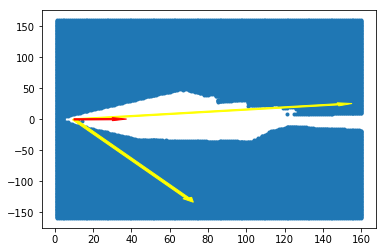

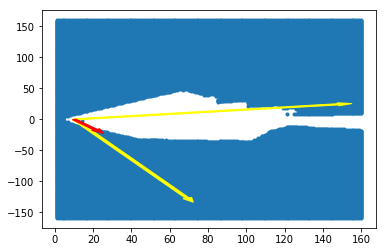

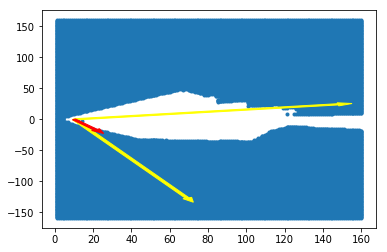

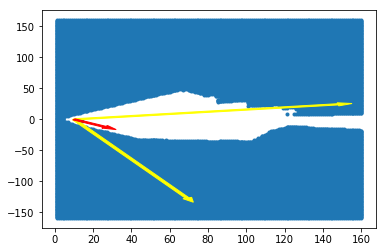

In [40]:

m1 = np.mean(nav_df.angles)
m2 = np.average(yaws_df.yaw, weights = (max_threshold - yaws_df.distance)/max_threshold)
m3 = np.average(yaws_df.yaw, weights = (np.abs(yaws_df.index.astype(float))))
m4 = np.mean([m1,m2, m3])



print('mean yaw angle: {}'.format(m1))
print('weighted mean yaw angle: {}'.format(m2))
print('weighted by heading yaw angle: {}'.format(m3))
print('weighted average: {}'.format(m4))    

for m in [m1, m2, m3, m4]:
    arrow_length = 20
    f, axarr = plt.subplots(1)
    axarr.plot(obs_pix_df.xpix, obs_pix_df.ypix, '.')
    x_arrow = arrow_length * np.cos(m)
    y_arrow = arrow_length * np.sin(m)
    axarr.arrow(10,0, 140*np.cos(np.deg2rad(right)), 140*np.sin(np.deg2rad(right)), color='yellow', zorder=2, head_width=5, width=2)
    axarr.arrow(10,0, 140*np.cos(np.deg2rad(left)), 140*np.sin(np.deg2rad(left)), color='yellow', zorder=2, head_width=5, width=2)

    axarr.arrow(10, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=5, width=2)
    plt.show()